# Метод подгонки

## Вспомогательные функции

In [1]:
from typing import List
import numpy as np
from matplotlib import pyplot as plt

In [2]:
"""
 Считает вектор x на основе диагоналей 3-диагональной матрицы и вектора f
 param under_diag  диагональ, лежащая под главной (нумеруется: [0; n - 2])
 param above_diag  диагональ, лежащая над главной (нумеруется: [0; n - 2])
 param main_diag   главная диагональ матрицы      (нумеруется: [0; n - 1])
 param f           вектор f (права часть)
 return            решение СЛАУ, массив x
"""
def calculate_progonkoj(under_diag: List[float], above_diag: List[float], main_diag: List[float], f: List[float]) -> List[float]:
    under_diag, above_diag, main_diag, f = map(tuple, (under_diag, above_diag, main_diag, f))
    n = len(f)
    assert(n == len(main_diag))
    assert(n == len(above_diag) + 1)
    assert(n == len(under_diag) + 1)

    alpha = [-above_diag[0] / main_diag[0]]
    beta = [f[0] / main_diag[0]]
    x = [0] * n

    for i in range(1, n - 1):
        alpha.append(-above_diag[i] / (under_diag[i - 1] * alpha[i - 1] + main_diag[i]))
        beta.append((f[i] - under_diag[i - 1] * beta[i - 1]) / (under_diag[i - 1] * alpha[i - 1] + main_diag[i]))

    # x[last] = last beta
    x[n - 1] = (f[n - 1] - under_diag[n - 2] * beta[n - 2]) / (under_diag[n - 2] * alpha[n - 2] + main_diag[n - 1])

    for i in range(n - 1, 0, -1):
        x[i - 1] = alpha[i - 1] * x[i] + beta[i - 1]

    return x

In [3]:
"""
 Считает вектор x на основе 3-диагональной матрицы matr и вектора f
 param matr   3-диагональная матрица
 param f      вектор f (права часть)
 return       решение СЛАУ, массив x
"""
def progonka(matr: List[List[float]], f: List[float]) -> List[float]:
    n = len(matr)
    assert n > 0
    if n == 1:
        return [f[0] / matr[0][0]]
    assert(len(matr[0]) == n)
    above_diag, under_diag, main_diag = [matr[0][1]], [], [matr[0][0]]
    for i, row in enumerate(matr[1:-1]):
        assert(len(row) == n)
        main_diag.append(row[i + 1])
        above_diag.append(row[i + 2])
        under_diag.append(row[i])
    main_diag.append(matr[-1][-1])
    under_diag.append(matr[-1][-2])
    return calculate_progonkoj(under_diag, above_diag, main_diag, f)

In [4]:
"""
 Функция выводит матрицу matr, вектор x и вектор f в выражении matr * x = f в читаемом виде
 param matr   матрица
 param x      вектор x
 param f      вектор f (права часть)
 return       решение СЛАУ, массив x
"""
def print_result(matr, f, x, matr_chars = 3, x_chars = 5, f_chars = 1):
    n = len(f)
    two_signs_round = lambda x: round(x, 2)
    custom_format = lambda x, num: ' ' * (num - len(str(x))) + str(x)
    custom_format_matr = lambda x: custom_format(x, matr_chars)
    x_round = tuple(map(two_signs_round, x))
    for i in range(n):
        print('|', end = '')
        print(''.join(map(custom_format_matr, matr[i]
)), end = '')
        print('| * |' if i == n // 2 else '|   |', end = '')
        print(custom_format(x_round[i], x_chars), end = '')
        print('| = |' if i == n // 2 else '|   |', end = '')
        print(custom_format(f[i], f_chars), end = '|\n')
    print()

## TEST

In [5]:
test = dict()
test['matr'] = [
    [
        [3]
    ],
    [
        [ 1, 1],
        [.2, 1]
    ],
    [
        [2, -1,  0],
        [5,  4,  2],
        [0,  1, -3]
    ],
    [
        [2, 1, 0, 0],
        [1]
    ]
]
test['f'] = [
    [6],
    [3, 3],
    [-5, -18, -40, -27]
]

# for i in range(len(test['matr'])):
#     matr = test['matr'][i]
#     f = test['f'][i]
#     x = progonka(matr, f)
#     print_result(matr, f, x)

def test_matrix_element(i, j):
    if i == j:
        return -2
    if abs(i-j) == 1:
        return 1
    return 0

n = 10
matrix = [
    [test_matrix_element(i, j)*(n+1)**2 for j in range(n)] for i in range(n)
]
f = [2 for i in range(n)]

x = progonka(matrix, f)
xy = [[i/(n+1), x[i-1] if 0 <= i - 1 <= n - 1 else 0] for i in range(n + 2)]
print_result(matrix, f, x, matr_chars=5, x_chars=6)

| -242  121    0    0    0    0    0    0    0    0|   | -0.08|   |2|
|  121 -242  121    0    0    0    0    0    0    0|   | -0.15|   |2|
|    0  121 -242  121    0    0    0    0    0    0|   |  -0.2|   |2|
|    0    0  121 -242  121    0    0    0    0    0|   | -0.23|   |2|
|    0    0    0  121 -242  121    0    0    0    0|   | -0.25|   |2|
|    0    0    0    0  121 -242  121    0    0    0| * | -0.25| = |2|
|    0    0    0    0    0  121 -242  121    0    0|   | -0.23|   |2|
|    0    0    0    0    0    0  121 -242  121    0|   |  -0.2|   |2|
|    0    0    0    0    0    0    0  121 -242  121|   | -0.15|   |2|
|    0    0    0    0    0    0    0    0  121 -242|   | -0.08|   |2|



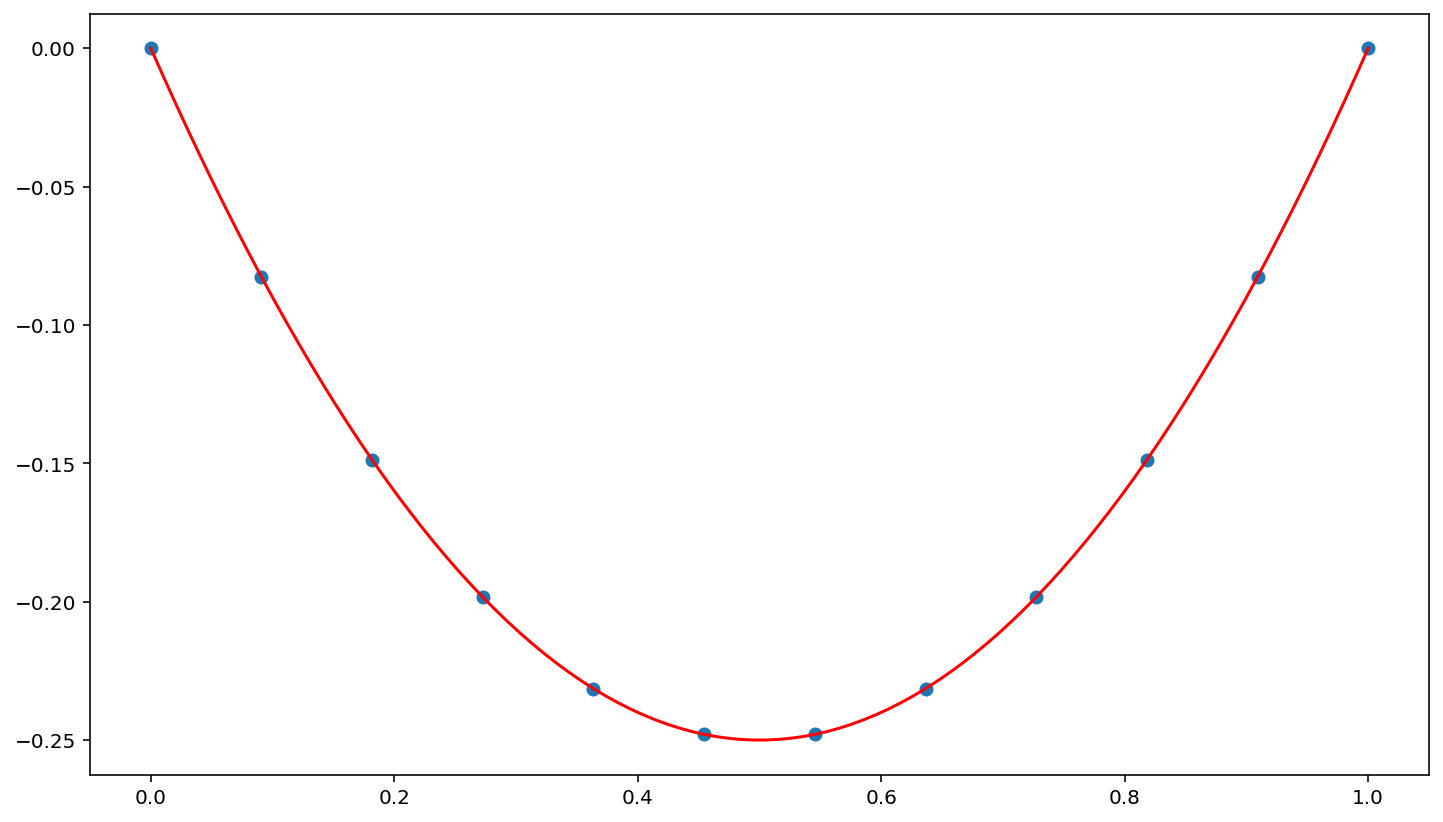

In [6]:
data = np.array(xy)
x, y = data.T
plt.scatter(x, y)

x = np.linspace(0, 1, 100)
y = x*(x-1)
plt.plot(x, y, 'r')

plt.show()